# Importing Required Packages/Libraries

In [ ]:
%pip install eli5
%pip install statsmodels
%pip install xgboost

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
import eli5
from eli5.sklearn import PermutationImportance

import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# Accessing the Datasets

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Exploring the "train" dataset

In [6]:
print(train.shape)
train.head(3)

(103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


### Two unnecessary columns, 'Unnamed: 0' and 'id', are dropped from the 'train' dataset. After removing these columns, the 'train.info()' function is used to check the size and information of the dataset.

In [7]:
# Removing unnecessary Columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)

# Checking the Resulting Dataset Size
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
# Checking the resulting dataframe (train)

print(train.shape)
train.head(3)

(103904, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


## Exploring the "test" dataset

In [9]:
print(test.shape)
test.head(3)

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


In [10]:
# Removing unnecessary Columns
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)

# Checking the Resulting Dataset Size
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [11]:
# Checking the resulting dataframe (test)

print(test.shape)
test.head(3)

(25976, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


## Column Name Modification: Replacing Spaces with Underscores (Train and Test Datasets)

In [12]:
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

## Label Encoding: Transforming "Satisfaction" Values into Binary Format (Train and Test Datasets)

In [13]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

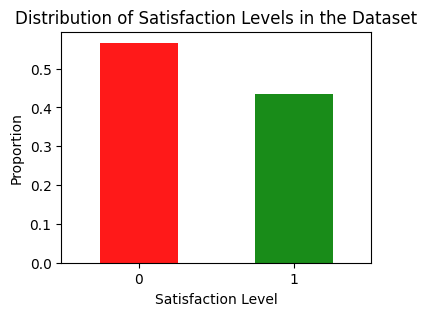

In [14]:
# Plotting the satisfaction indicator
fig = plt.figure(figsize=(4, 3))
train.satisfaction.value_counts(normalize=True).plot(kind='bar', color=['red', 'green'], alpha=0.9, rot=0)

# Setting plot title and axis labels
plt.title('Distribution of Satisfaction Levels in the Dataset')
plt.xlabel('Satisfaction Level')
plt.ylabel('Proportion')

# Displaying the plot
plt.show()

#### The plot indicates a fairly balanced distribution of satisfaction levels, with approximately 55% for "neutral/dissatisfied" passengers and 45% for "satisfied" passengers. Consequently, there is no immediate need for resampling techniques to address class imbalance in the dataset.

## Managing Missing Data: Strategies and Techniques

In [15]:
# Calculate the total count of missing values for each column ('train' dataset) 
total = train.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values for each column ('train' dataset)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)

# Concatenate the total count and percentage of missing values into a DataFrame called 'missing'
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Exclude rows with zero total missing values
missing = missing[missing['Total'] > 0]

# Display the top rows of the 'missing' DataFrame
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984


In [16]:
# Imputing missing value with mean - Train and Test
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [17]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [18]:
# Replace NaN with mode (most frequent value) for categorical variables in the 'train' dataset
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

# Replace NaN with mode (most frequent value) for categorical variables in the 'test' dataset
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

## Uncovering Insights through Data Exploration

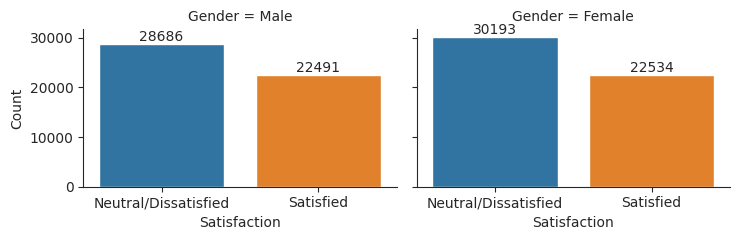

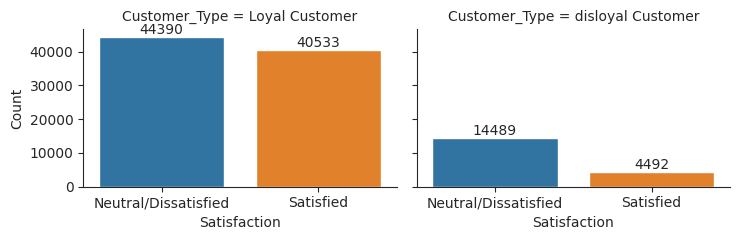

In [19]:
# Exploring Satisfaction Levels by Gender and Customer Type

with sns.axes_style(style='ticks'):
    gender_plot = sns.catplot(x="satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)
    gender_plot.set_xticklabels(["Neutral/Dissatisfied", "Satisfied"])
    gender_plot.set_axis_labels("Satisfaction", "Count")
    for ax in gender_plot.axes.flat:
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
    customer_type_plot = sns.catplot(x="satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)
    customer_type_plot.set_xticklabels(["Neutral/Dissatisfied", "Satisfied"])
    customer_type_plot.set_axis_labels("Satisfaction", "Count")
    for ax in customer_type_plot.axes.flat:
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

**Findings:** 

Gender: The analysis reveals that there is a similar distribution of neutral/dissatisfied and satisfied customers across gender. Both male and female passengers exhibit a higher proportion of neutral/dissatisfied customers compared to satisfied customers.

Customer Type: Among the customer types, even though the number of loyal passengers is relatively high, the ratio of satisfied to neutral/dissatisfied customers is almost evenly split in it (loyal passengers) at around 48:52.

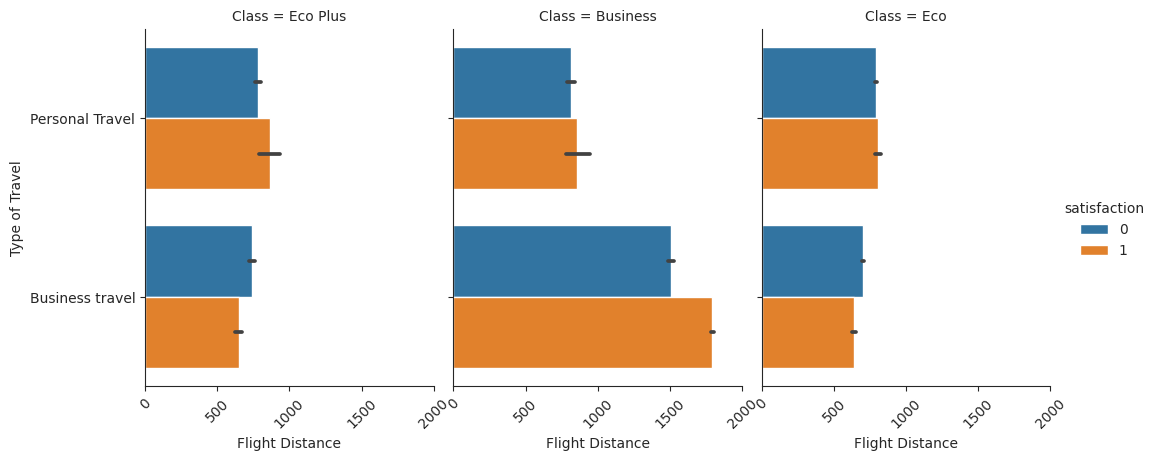

In [20]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style(style='ticks'):
    satisfaction_plot = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)
    satisfaction_plot.set_axis_labels("Flight Distance", "Type of Travel")
    satisfaction_plot.set_xticklabels(rotation=45)

**Findings:** The analysis reveals that within the business travel category and specifically in the business class, there is a notable increase in the number of satisfied passengers for longer flight distances. However, for other combinations of travel type, flight distance, and class, a relatively equal distribution of satisfied and neutral/dissatisfied passengers is observed.

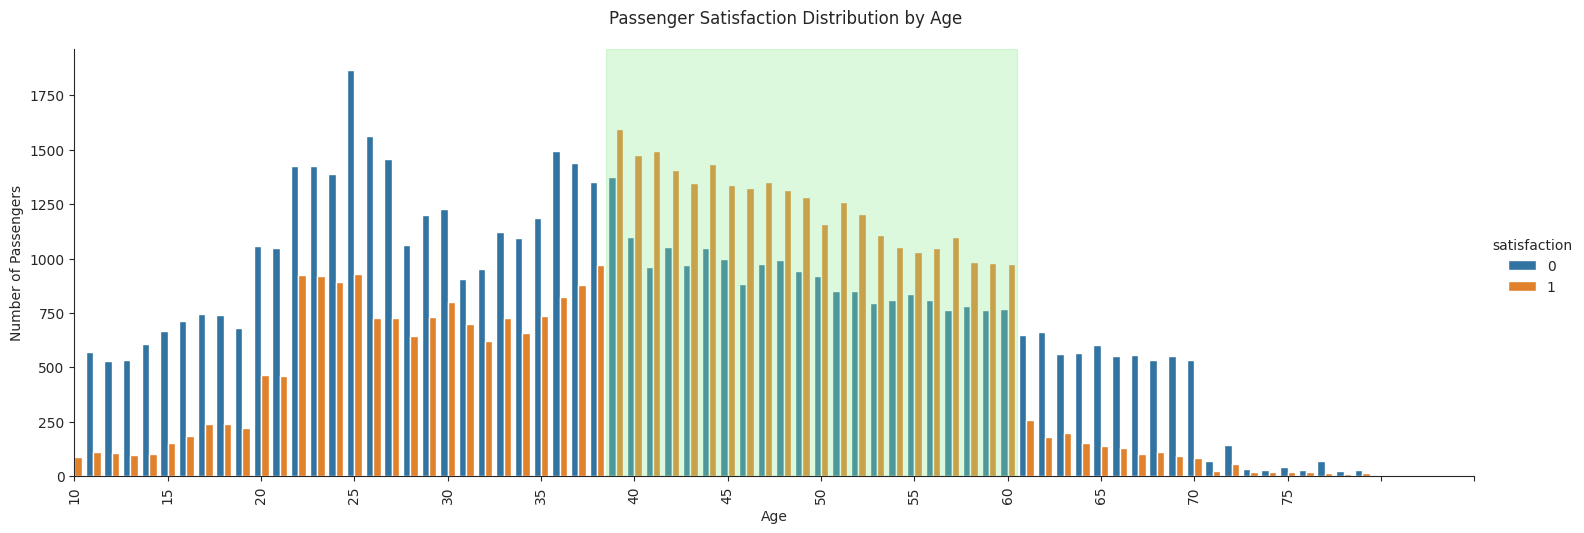

In [21]:
# Analysis of Passenger Satisfaction by Age
with sns.axes_style(style='ticks'):
    age_plot = sns.catplot(x="Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    age_plot.set_ylabels('Number of Passengers')
    age_plot.fig.suptitle('Passenger Satisfaction Distribution by Age', y=1.05)

    # Highlight age groups 39-60
    age_plot.ax.axvspan(33.5, 55.5, color='lightgreen', alpha=0.3)
    
    # Adjust x-axis range and labels
    plt.xlim(5, 80)
    plt.xticks(range(5, 81, 5), rotation=90)

**Findings:** From ages 7 to 38 and from ages 61 to 79, there is a notable prevalence of neutral/dissatisfied passengers compared to satisfied passengers. Conversely, in the age group of 39 to 60 (green highlighted), the number of satisfied passengers surpasses that of neutral/dissatisfied passengers. This age-based variation in satisfaction levels highlights the importance of considering age demographics when addressing customer satisfaction within the airline industry.

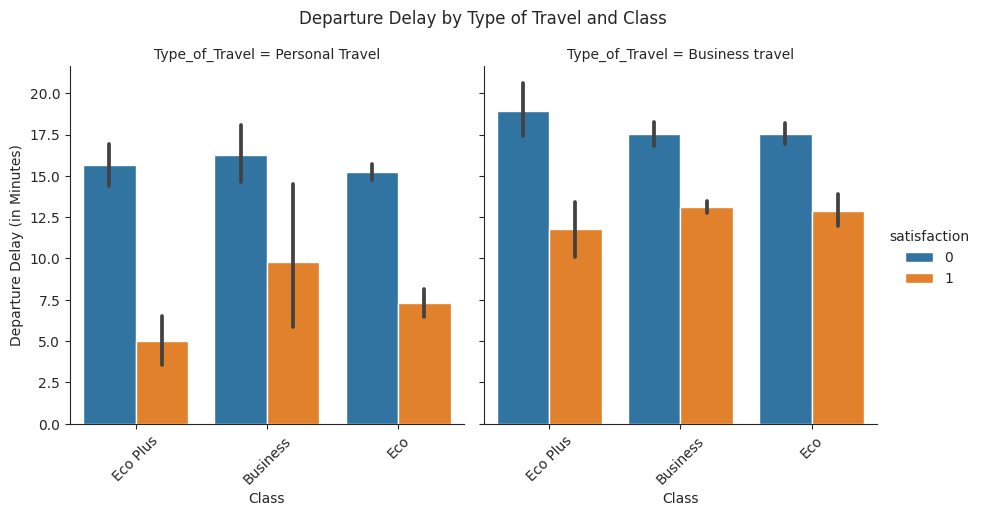

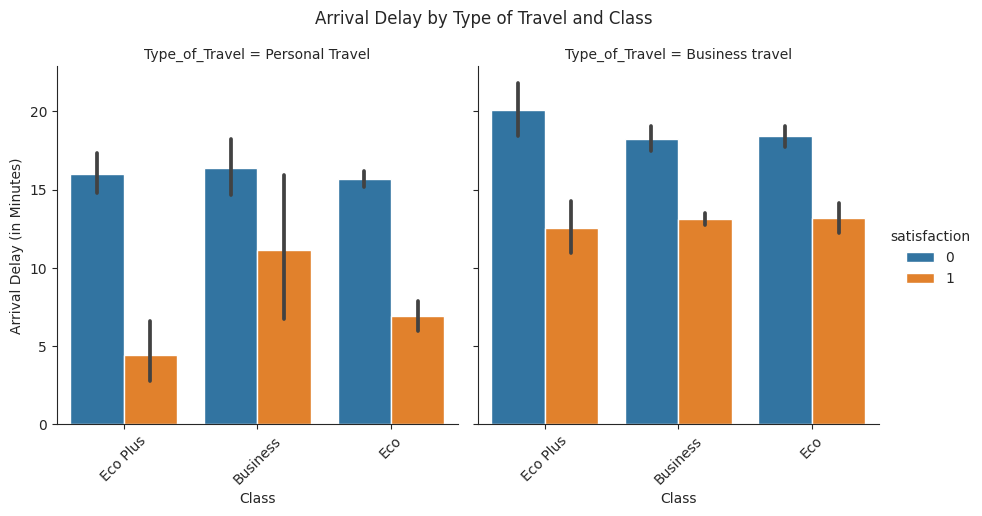

In [22]:
# Analysis of Departure and Arrival Delays by Type of Travel and Class
with sns.axes_style(style='ticks'):
    g1 = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)
    g1.fig.suptitle('Departure Delay by Type of Travel and Class', y=1.05)
    g1.set_xticklabels(rotation=45)
    g1.set_ylabels('Departure Delay (in Minutes)')
    
    g2 = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)
    g2.fig.suptitle('Arrival Delay by Type of Travel and Class', y=1.05)
    g2.set_xticklabels(rotation=45)
    g2.set_ylabels('Arrival Delay (in Minutes)')

**Findings:** In the case of personal type of travel, particularly for classes Eco Plus and Eco, it is evident that there is a significant increase in the number of neutral/dissatisfied passengers when the arrival delay is high, which is expected. 

When examining the data on a minute-by-minute basis, it is observed that all combinations have a higher count of neutral/dissatisfied passengers compared to satisfied passengers.

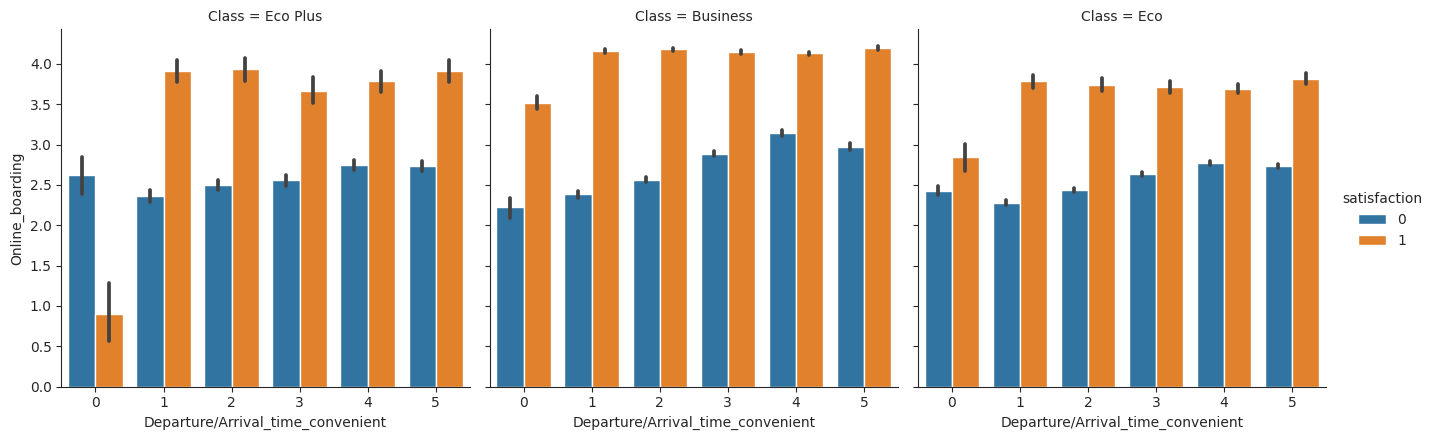

In [23]:
# Analysis of Online Boarding Experience and Departure/Arrival Time Convenience by Class

with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

**Findings:** In the Eco Plus class, a significant number of neutral/dissatisfied passengers are observed when the Departure/Arrival time convenience is rated as very inconvenient (score 0), despite positive online boarding experiences. However, in other class combinations, the number of satisfied passengers outweighs the number of neutral/dissatisfied passengers.

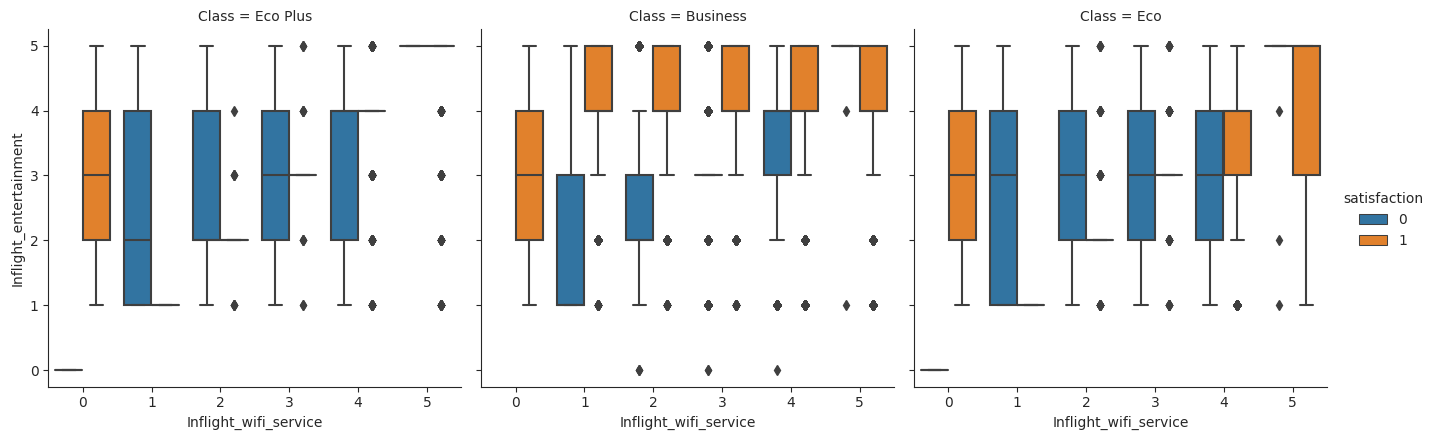

In [24]:
# Analysis of Inflight Wi-Fi Service and Inflight Entertainment by Class

with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

**Findings:** 

(i) Eco Plus passengers show higher satisfaction levels when they do not have access to inflight Wi-Fi (rating 0) and when they experience moderate levels of inflight entertainment (ratings 2-4). 

(ii) In the case of Business class passengers, maximum satisfaction is achieved when they have access to the highest level of inflight entertainment (rating 5). 

(iii) For Eco class passengers, a combination of high levels of inflight entertainment (ratings 3-5) and excellent Wi-Fi service availability (rating 5) contributes to their satisfaction.

### Satisfaction Ratings for Online Booking, Seat Comfort, Cleanliness, and Food & Drink

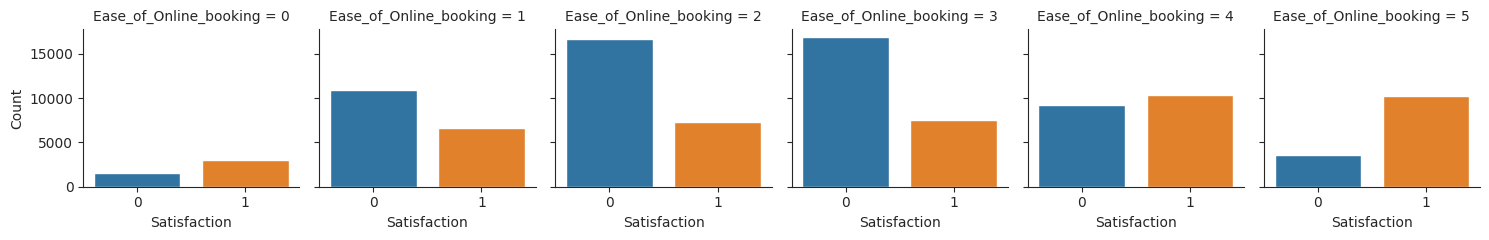

In [25]:
# Analysis of Satisfaction based on Ease of Online Booking
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)
    g.set_axis_labels("Satisfaction", "Count")

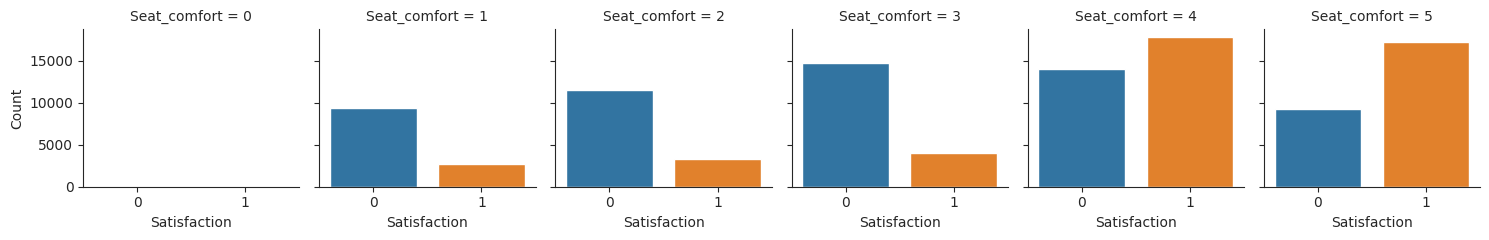

In [26]:
# Analysis of Satisfaction based on Seat Comfort
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)
    g.set_axis_labels("Satisfaction", "Count")

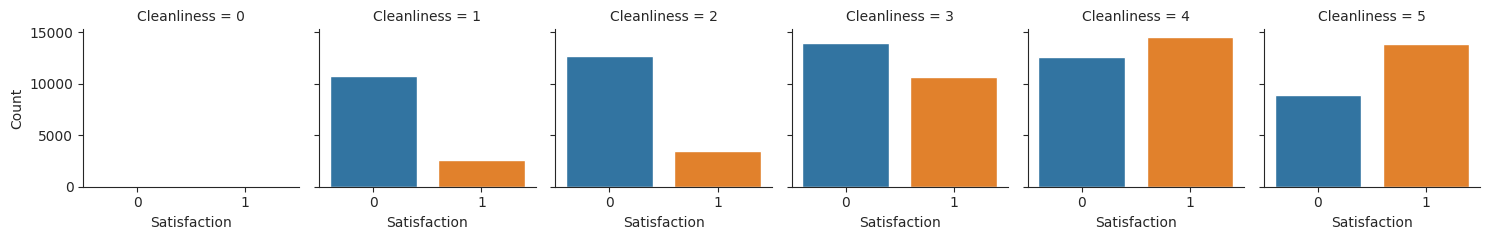

In [27]:
# Analysis of Satisfaction based on Cleanliness
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)
    g.set_axis_labels("Satisfaction", "Count")

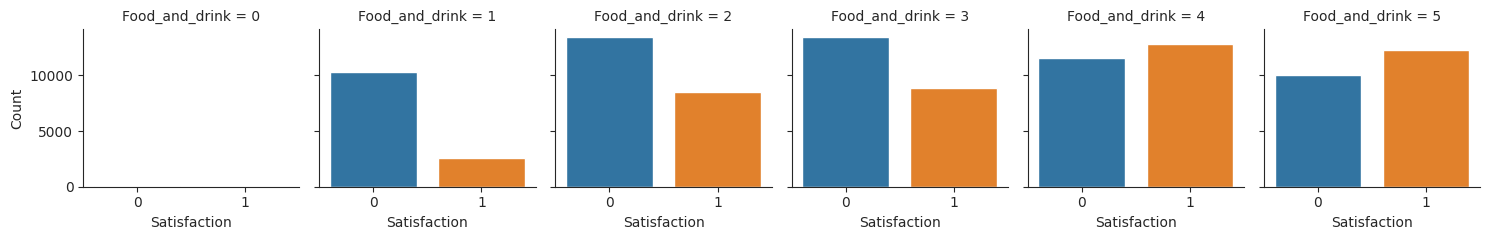

In [28]:
# Analysis of Satisfaction based on Food and Drink
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)
    g.set_axis_labels("Satisfaction", "Count")

**Findings:** Based on the analysis of these four features, it can be observed that the majority of satisfied passengers provided ratings of 4 and 5. On the other hand, passengers who rated these features below 4 tended to be more neutral or dissatisfied.

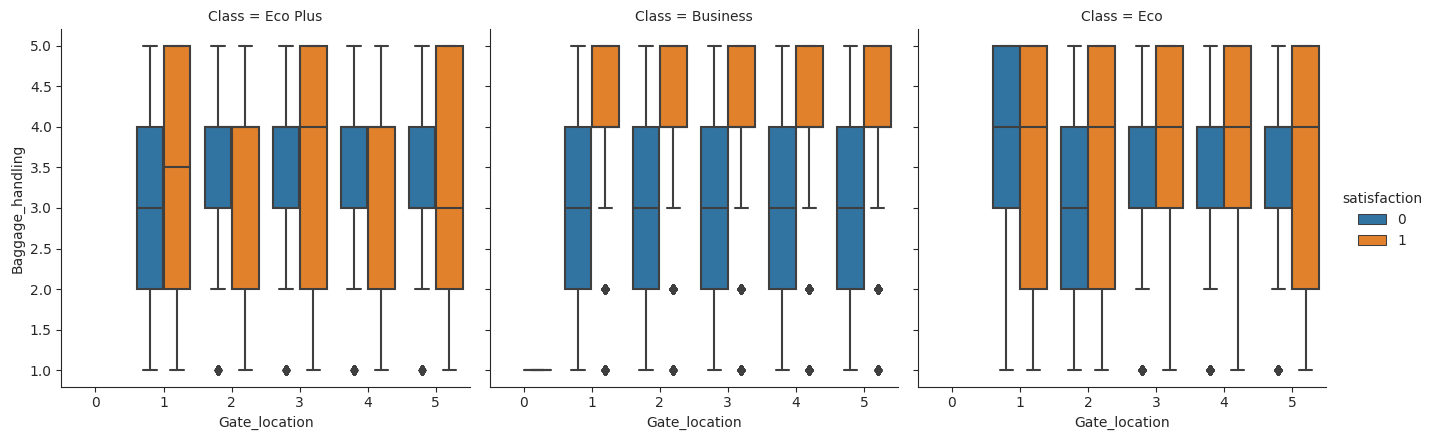

In [29]:
# Analysis of Baggage Handling and Gate Location by Class

with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

**Findings:** After analyzing the data, it is evident that in the business class category, a higher number of neutral/dissatisfied passengers can be observed across all gate locations when the baggage handling rating is below satisfactory (rating <= 4). Additionally, for Eco Plus class, when the gate location is 1, and for Eco class, when the gate location is 2, passengers tend to remain neutral/dissatisfied even when the baggage handling is rated as mediocre (rating 2 to 4). These findings highlight the importance of both gate location and quality of baggage handling in influencing passenger satisfaction levels.

<Axes: xlabel='Inflight_service', ylabel='satisfaction'>

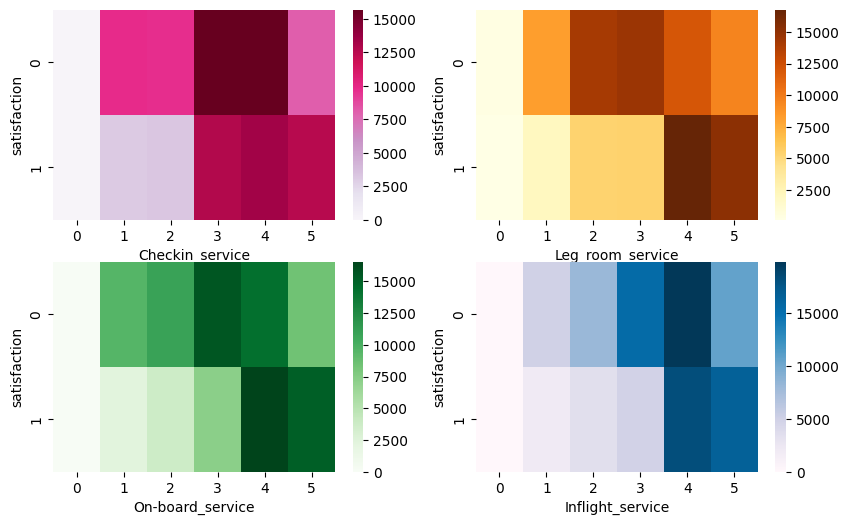

In [30]:
# Heatmap Analysis of Passenger Satisfaction Level for Checkin_service, Leg_room_service, On-board_service and Inflight_service

fig, axarr = plt.subplots(2, 2, figsize=(10, 6))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

**Findings:** Passenger satisfaction analysis reveals that for the check-in service, passengers who provided ratings of 0-2 were predominantly neutral or dissatisfied. Conversely, for the remaining services (leg room, on-board, and in-flight), satisfaction was primarily observed among passengers who rated these services with 4 or 5.

### Encoding Categorical Variables Using Label Encoding

In [31]:
# For Train set
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [32]:
# For Test Set
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])


### Identifying and Eliminating Outliers

The interquartile range (IQR) for each numerical variable in the dataset, represents the range between the 25th and 75th percentiles of the data. For instance, the IQR for the 'Age' variable is 24, indicating that the middle 50% of the age values fall within this range. 

By calculating the IQR, we can identify potential outliers in the data by considering values that are significantly higher or lower than the range defined by the IQR.

In [33]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [34]:
# Removal of outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

### Exploring Feature Correlations

<Axes: >

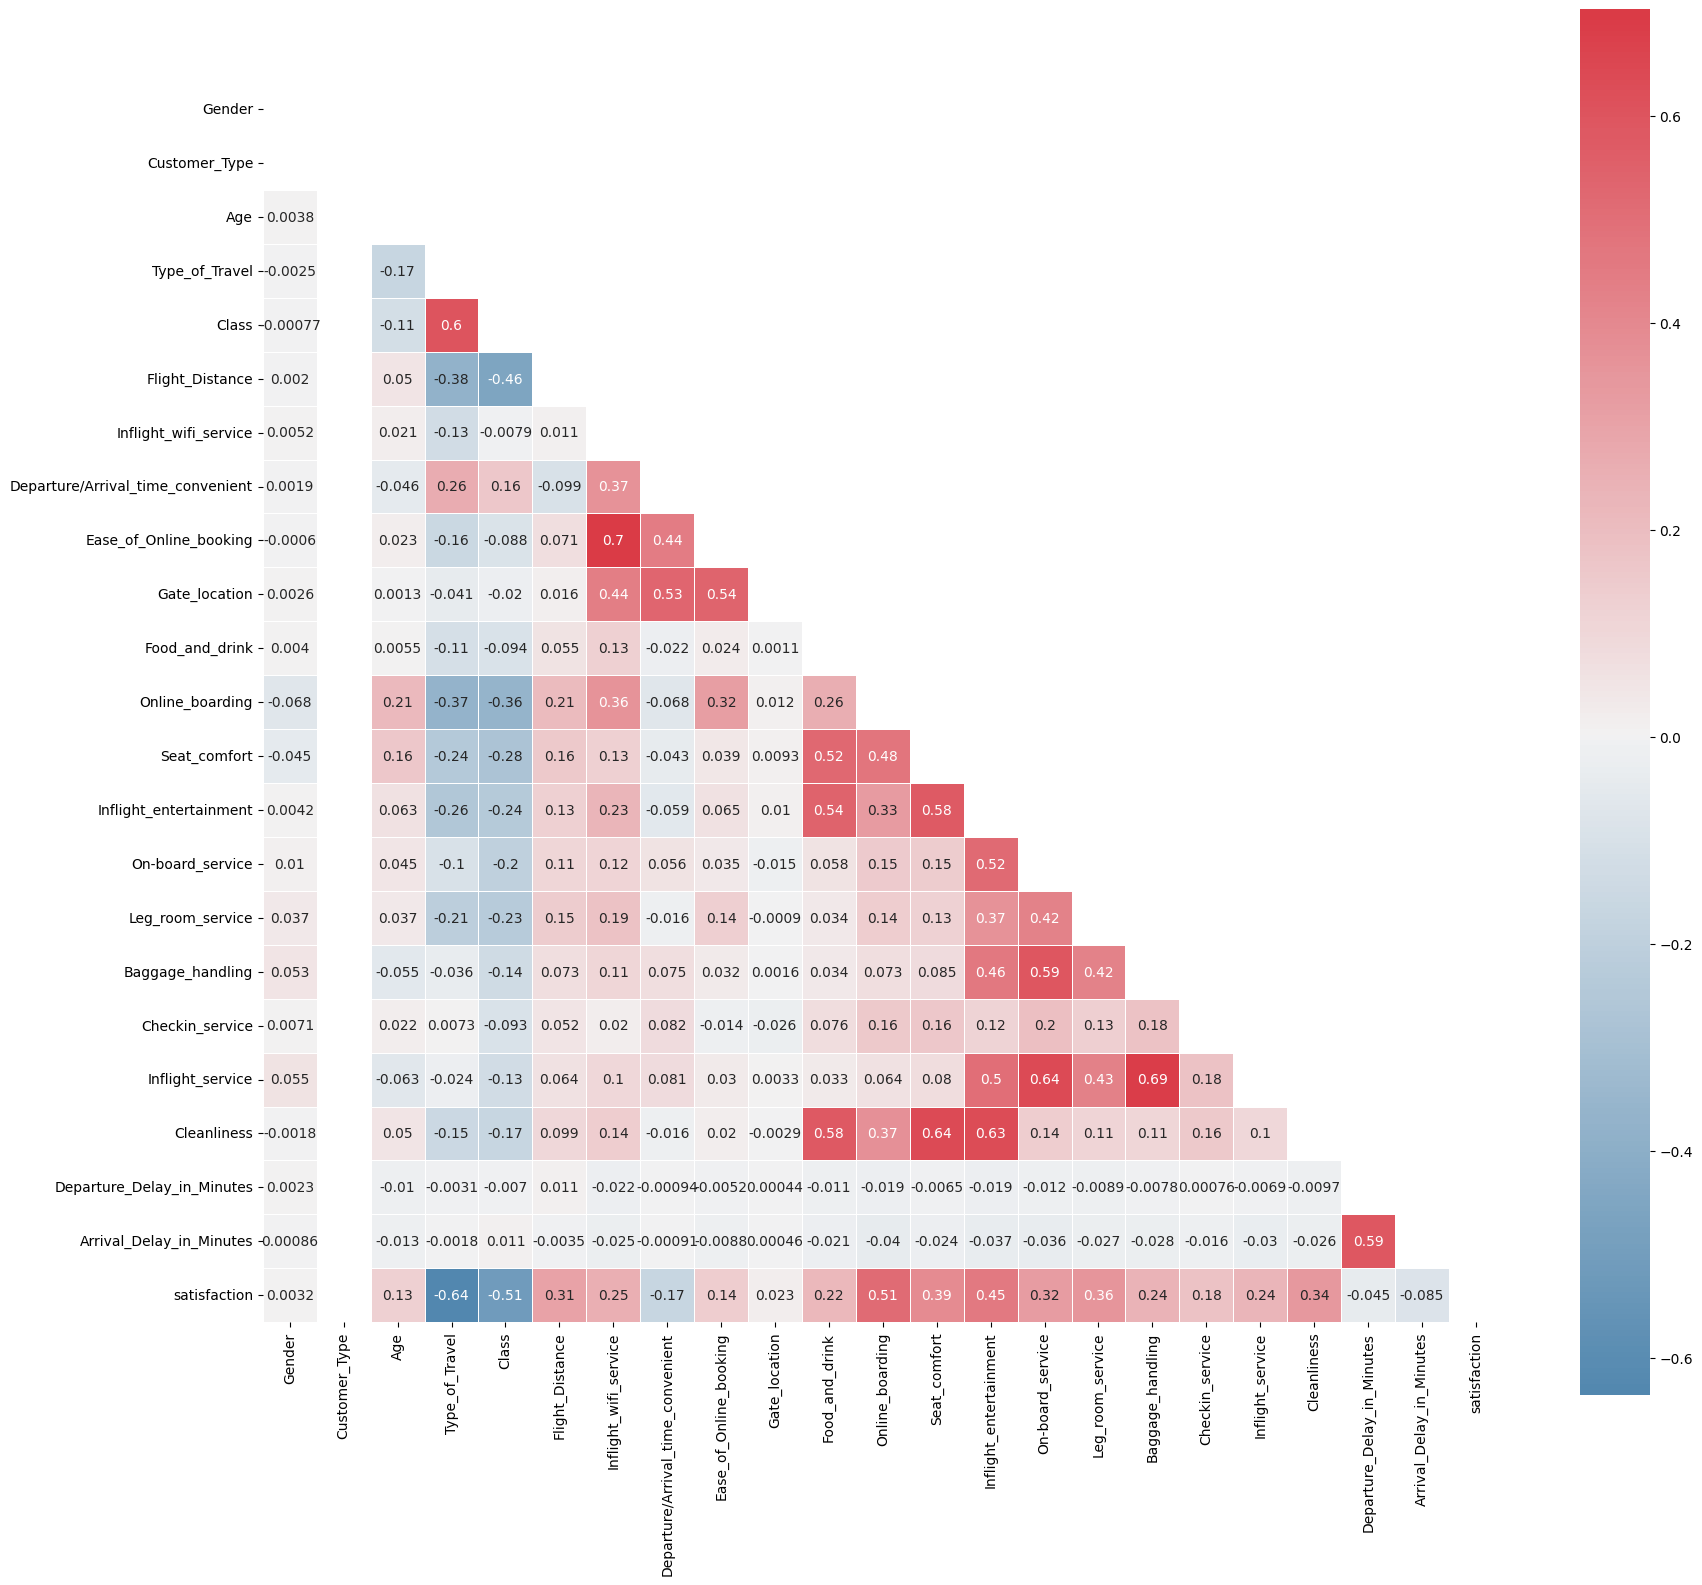

In [35]:
# Correlation Heatmap

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

**Findings:** The feature "Ease_of_Online_booking" exhibits a strong correlation with "Inflight_wifi_service", while "Inflight_service" demonstrates a high correlation with "Baggage_handling". However, none of the feature pairs have a correlation coefficient equal to 1, indicating the absence of perfect multicollinearity. As a result, we do not need to discard any variables in our analysis.

### Feature Selection using Chi-Square: Identifying the Top 10 Features

In [36]:
# Perform feature scaling using Min-Max scaling technique (i.e., transform the train dataset using MinMaxScaler and stores the scaled data in a new DataFrame called modified_data)

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [37]:
# Conduct feature selection using the chi-square test. We will identify the top 10 features from the modified data based on their chi-square scores and prints their column names.

X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


### Assessing Feature Importance: Wrapper Method

In [38]:
X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
[0.00412513 0.         0.0258749  0.21982853 0.08990315 0.03140161
 0.12224491 0.01737014 0.03081474 0.01485982 0.01068989 0.11324523
 0.06338185 0.06652081 0.02798984 0.04231821 0.02388634 0.02276466
 0.02411625 0.03309566 0.00702376 0.00854455]


**Findings:** A set of six features has been identified (see above) as inherently important contributors to customer or passenger satisfaction. In order to validate the results, an additional feature importance method was employed for cross-referencing.

### Assessing Feature Importance: Permutation

In [39]:
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.2723 ± 0.0039,Type_of_Travel
0.1278 ± 0.0026,Inflight_wifi_service
0.0435 ± 0.0011,Online_boarding
0.0424 ± 0.0013,Seat_comfort
0.0355 ± 0.0009,Checkin_service
0.0294 ± 0.0014,Inflight_service
0.0289 ± 0.0008,Baggage_handling
0.0246 ± 0.0006,Cleanliness
0.0177 ± 0.0007,On-board_service
0.0172 ± 0.0007,Class


Based on the conducted analysis, the following features have been identified as significant factors influencing customer or passenger satisfaction:

**Most Important Features:**

(i) Type_of_Travel

(ii) Inflight_wifi_service

(iii) Online_boarding

(iv) Seat_comfort



**Other Important Features:**

(i) Class

(ii) Flight_Distance

(iii) Inflight_entertainment

(iv) On-board_service

(v) Leg_room_service

(vi) Cleanliness

(vii) Checkin_service

(viii) Inflight_service

(ix) Baggage_handling

## Model Development and Evaluation

In [40]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    t0 = time.time()
    if verbose == False:
        model.fit(X_train_scaled, y_train.ravel(), verbose=0)
    else:
        model.fit(X_train_scaled, y_train.ravel())
    
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time() - t0
    
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot(cmap=plt.cm.Purples, values_format='.0f')
    plt.title('Confusion Matrix')
    plt.figure(figsize=(8, 6))
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc_display.plot()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.figure(figsize=(8, 6))
    plt.show()
    
    return model, accuracy, roc_auc, time_taken

#### 1. Logistic Regression

Accuracy = 0.8131736987988912
ROC Area under Curve = 0.8200542853624898
Time taken = 0.16826558113098145
              precision    recall  f1-score   support

           0    0.88762   0.76367   0.82100     14573
           1    0.74371   0.87644   0.80464     11403

    accuracy                        0.81317     25976
   macro avg    0.81567   0.82005   0.81282     25976
weighted avg    0.82445   0.81317   0.81381     25976



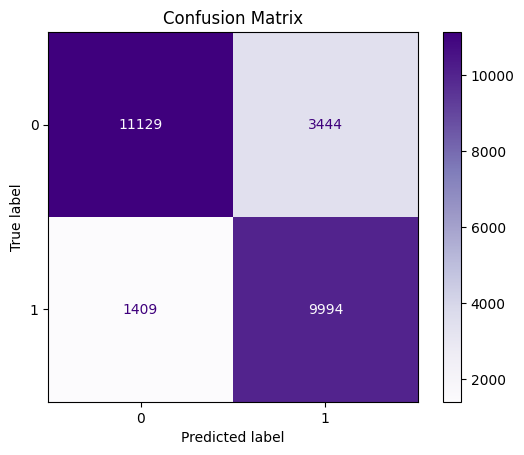

<Figure size 800x600 with 0 Axes>

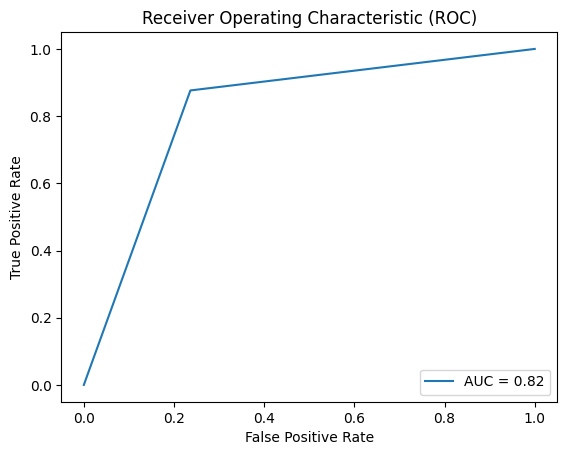

<Figure size 800x600 with 0 Axes>

In [52]:
# Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

**Findings:** 

Accuracy: The model achieved an accuracy of approximately 81.33%, indicating that it correctly classified 81.33% of the instances in the dataset.

ROC Area under Curve (AUC): The AUC value of 0.82 suggests that the model has a good discriminatory power in distinguishing between the two classes (satisfied and dissatisfied passengers).

Precision and Recall: The precision and recall scores for both classes indicate the model's ability to correctly identify positive instances (satisfied passengers) and negative instances (dissatisfied passengers). The precision values are 88.77% for class 0 and 74.38% for class 1, while the recall values are 76.38% for class 0 and 87.65% for class 1.

F1-score: The F1-score combines precision and recall, providing a balanced measure of the model's performance. The F1-scores for class 0 and class 1 are 0.82111 and 0.80475, respectively.

Time taken: The model training and evaluation process took approximately 0.68 seconds, indicating a relatively quick processing time.

In [53]:
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.309527
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                61197
Model:                          Logit   Df Residuals:                    61185
Method:                           MLE   Df Model:                           11
Date:                Sat, 10 Jun 2023   Pseudo R-squ.:                  0.5533
Time:                        12:08:06   Log-Likelihood:                -18942.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6437      0.016   -101.562      0.000      -1.675      -1.612
x2             0.2389      0.

**Findings:** Based on the statistical analysis, it is evident that out of the 12 features examined, 11 features, except for the 6th feature (Inflight_entertainment), exhibit a statistically significant impact on the target variable (passenger satisfaction) with a p-value less than 0.05. These features are deemed highly important in influencing passenger satisfaction.

Furthermore, the pseudo R-square value (McFadden's Pseudo R-Squared Value) of 0.55 indicates an excellent fit of the model, suggesting that a substantial proportion of the variation in the target variable can be explained by the selected features.

#### 2. Naive Bayes Classifier

Accuracy = 0.8334616569140745
ROC Area under Curve = 0.8345493488740687
Time taken = 0.016743183135986328
              precision    recall  f1-score   support

           0    0.87081   0.82564   0.84762     14573
           1    0.79102   0.84346   0.81640     11403

    accuracy                        0.83346     25976
   macro avg    0.83092   0.83455   0.83201     25976
weighted avg    0.83578   0.83346   0.83392     25976



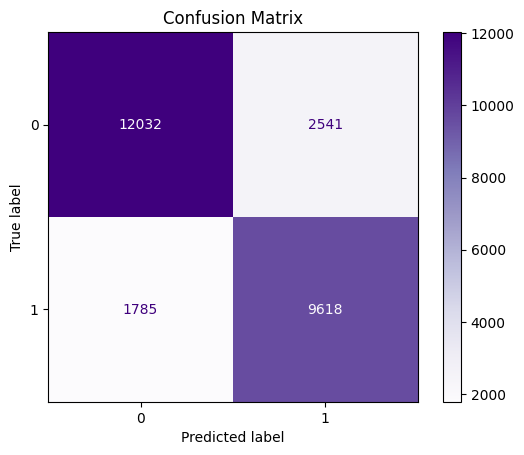

<Figure size 800x600 with 0 Axes>

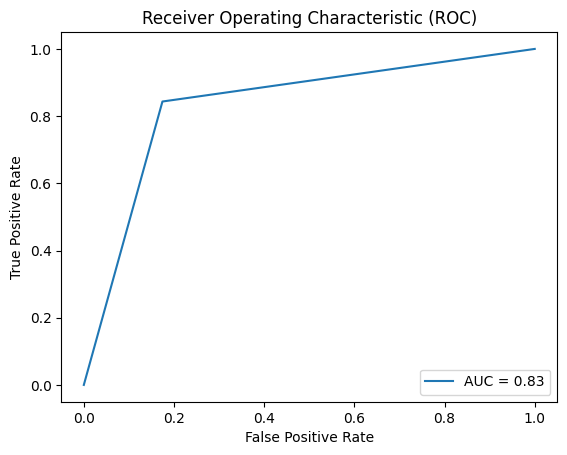

<Figure size 800x600 with 0 Axes>

In [56]:
params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

#### 3. K-Nearest Neighbor Classifier

Accuracy = 0.8792731752386819
ROC Area under Curve = 0.8814254248234368
Time taken = 2.627432346343994
              precision    recall  f1-score   support

           0    0.91622   0.86379   0.88923     14573
           1    0.83779   0.89906   0.86734     11403

    accuracy                        0.87927     25976
   macro avg    0.87701   0.88143   0.87829     25976
weighted avg    0.88179   0.87927   0.87962     25976



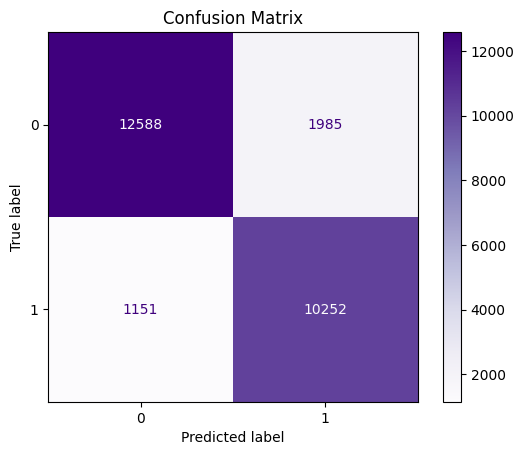

<Figure size 800x600 with 0 Axes>

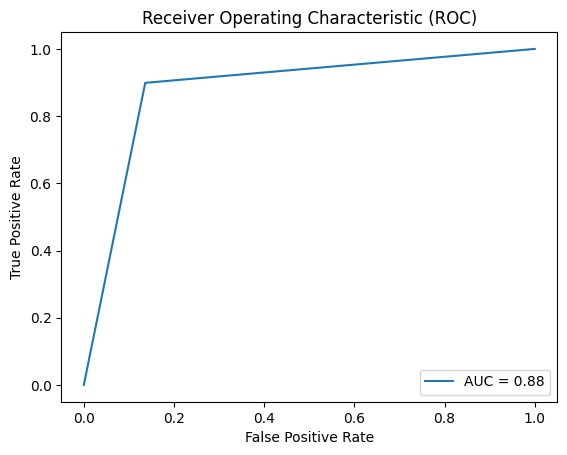

<Figure size 800x600 with 0 Axes>

In [59]:
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

#### 4. Decision Tree Classifier

Accuracy = 0.8870880813058207
ROC Area under Curve = 0.891003795200916
Time taken = 0.03998136520385742
              precision    recall  f1-score   support

           0    0.93452   0.85892   0.89513     14573
           1    0.83659   0.92309   0.87772     11403

    accuracy                        0.88709     25976
   macro avg    0.88556   0.89100   0.88642     25976
weighted avg    0.89153   0.88709   0.88748     25976



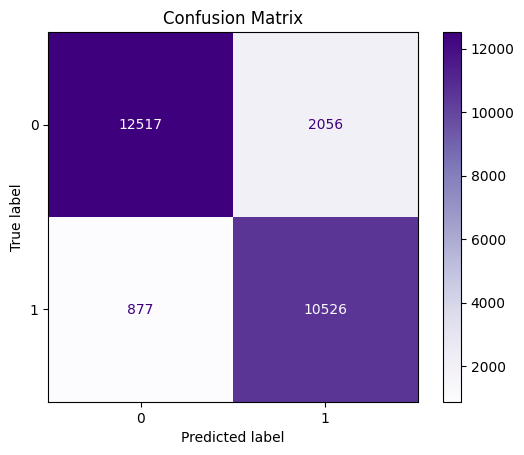

<Figure size 800x600 with 0 Axes>

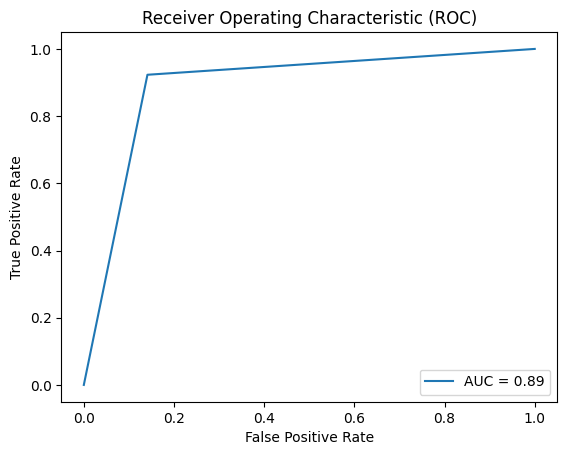

<Figure size 800x600 with 0 Axes>

In [61]:
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

#### 5. Neural Network

Accuracy = 0.8698413920542039
ROC Area under Curve = 0.8733151492304971
Time taken = 11.655415296554565
              precision    recall  f1-score   support

           0    0.91662   0.84485   0.87927     14573
           1    0.81975   0.90178   0.85881     11403

    accuracy                        0.86984     25976
   macro avg    0.86819   0.87332   0.86904     25976
weighted avg    0.87410   0.86984   0.87029     25976



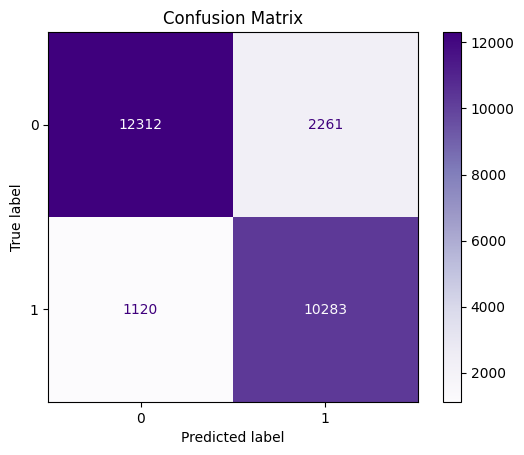

<Figure size 800x600 with 0 Axes>

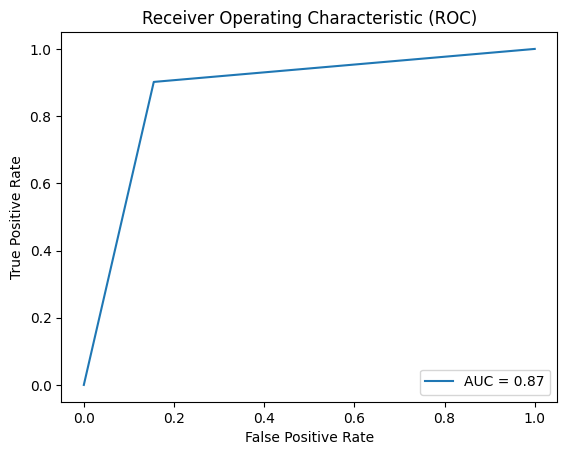

<Figure size 800x600 with 0 Axes>

In [64]:
# Neural Network (Multilayer Perceptron)
params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

#### 6. Random Forest

Accuracy = 0.8941330458885125
ROC Area under Curve = 0.9003728693084586
Time taken = 2.3241939544677734
              precision    recall  f1-score   support

           0    0.95723   0.84924   0.90001     14573
           1    0.83161   0.95150   0.88753     11403

    accuracy                        0.89413     25976
   macro avg    0.89442   0.90037   0.89377     25976
weighted avg    0.90208   0.89413   0.89453     25976



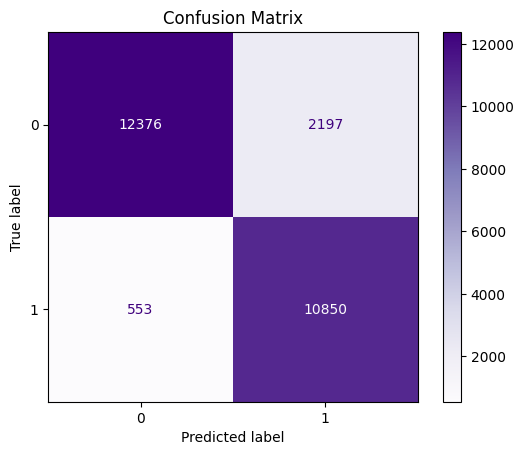

<Figure size 800x600 with 0 Axes>

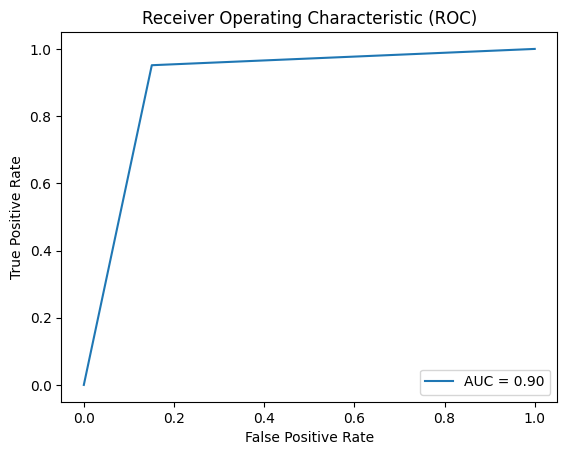

<Figure size 800x600 with 0 Axes>

In [66]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

**Findings:** Based on the results, the Random Forest model has demonstrated excellent performance in terms of both Accuracy and the area under the ROC curve. To ensure consistency in accuracy, it is crucial to determine the minimum number of decision trees required since Random Forest is composed of multiple Decision Trees.

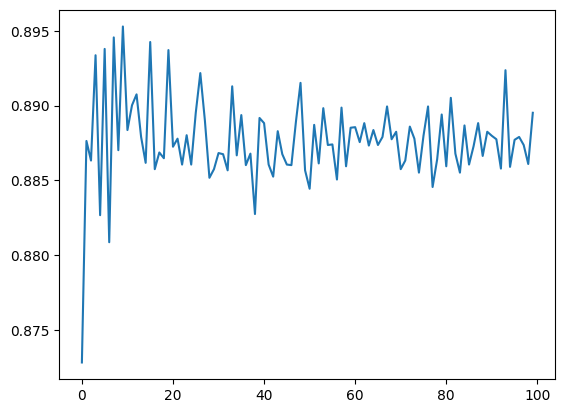

In [67]:
trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

**Findings:** Based on the analysis of the graph, it can be inferred that a minimum of 40 trees is required to achieve a reasonably consistent accuracy. Although there is still some minimal fluctuation present, further experimentation with a higher number of iterations could be conducted to evaluate its impact on accuracy.

#### 7. Extreme Gradient Boosting

Accuracy = 0.888820449645827
ROC Area under Curve = 0.8960196091950001
Time taken = 7.480684995651245
              precision    recall  f1-score   support

           0    0.95964   0.83703   0.89415     14573
           1    0.82096   0.95501   0.88293     11403

    accuracy                        0.88882     25976
   macro avg    0.89030   0.89602   0.88854     25976
weighted avg    0.89876   0.88882   0.88922     25976



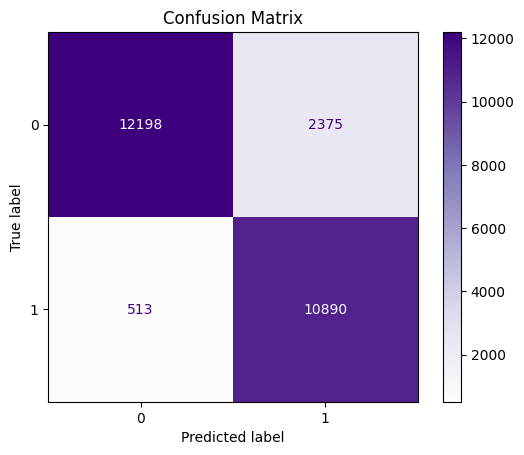

<Figure size 800x600 with 0 Axes>

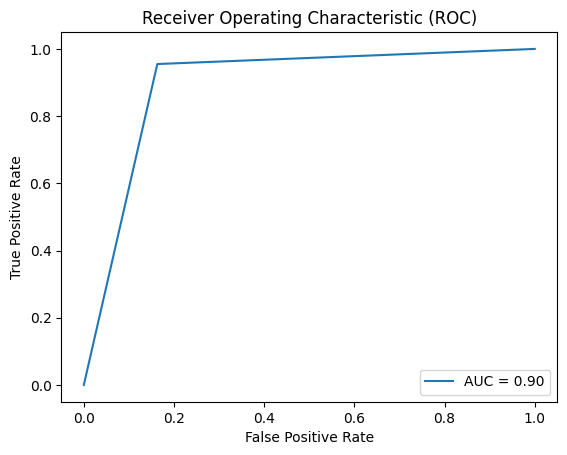

<Figure size 800x600 with 0 Axes>

In [71]:
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

#### 8. Adaptive Gradient Boosting

Accuracy = 0.8955189405605174
ROC Area under Curve = 0.8996241085930146
Time taken = 9.177162408828735
              precision    recall  f1-score   support

           0    0.94313   0.86599   0.90291     14573
           1    0.84494   0.93326   0.88691     11403

    accuracy                        0.89552     25976
   macro avg    0.89403   0.89962   0.89491     25976
weighted avg    0.90002   0.89552   0.89589     25976



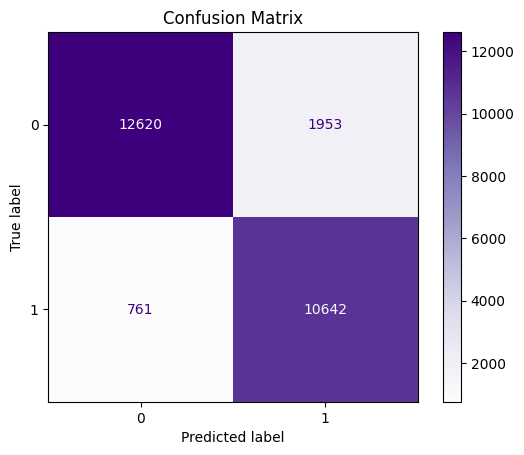

<Figure size 800x600 with 0 Axes>

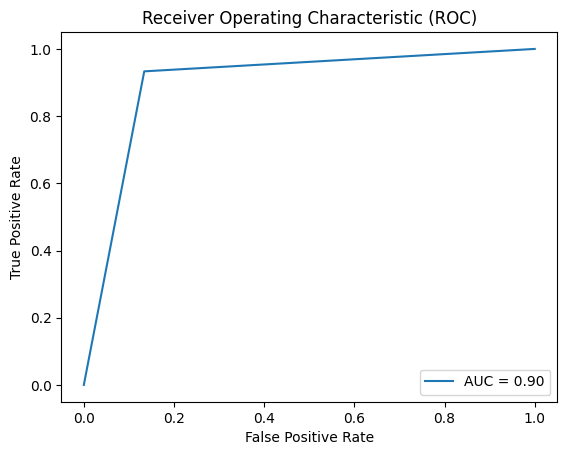

<Figure size 800x600 with 0 Axes>

In [73]:
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = AdaBoostClassifier(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

### Visualizing Decision Regions for Various Models

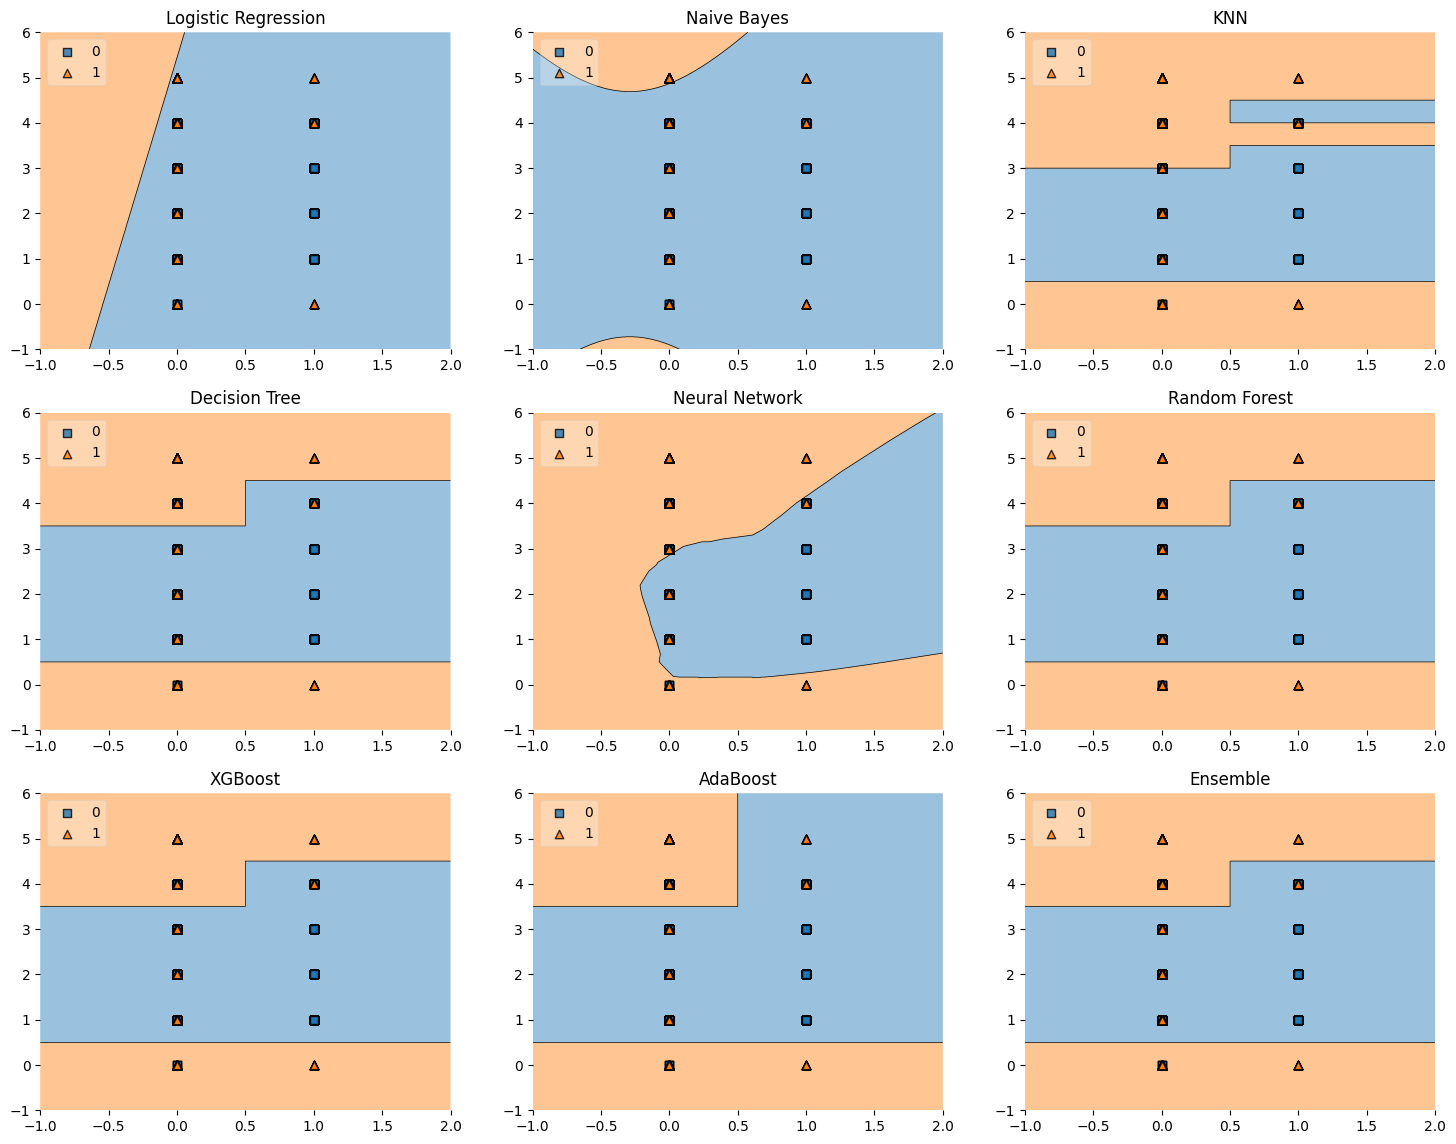

In [77]:
value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345) 
clf5 = MLPClassifier(random_state=12345, verbose = 0)
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

# Considering only the most important features
X_list = train[["Type_of_Travel", "Inflight_wifi_service", "Online_boarding", "Seat_comfort"]]
X = np.asarray(X_list, dtype=np.float32)
y_list = train["satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Decision Regions Plotting
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Naive Bayes',
          'KNN',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'XGBoost',
          'AdaBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value, 3: value}, 
                                filler_feature_ranges={2: width, 3: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

### Compare Model Performances: ROC_AUC Score and Execution Time Analysis

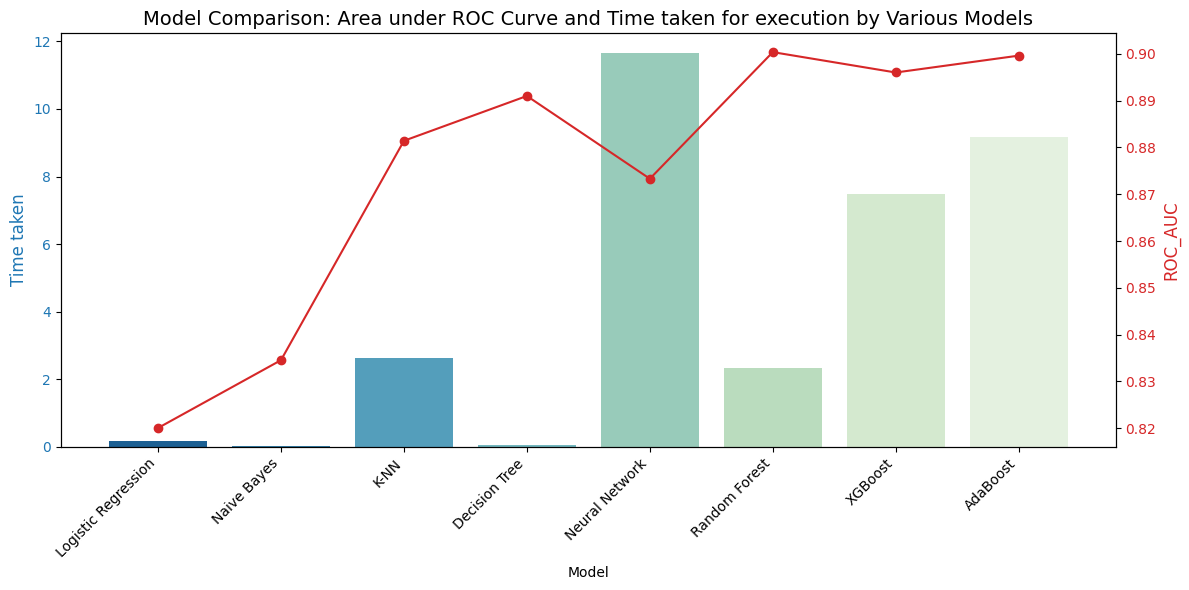

In [84]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression', 'Naive Bayes', 'K-NN', 'Decision Tree', 'Neural Network', 'Random Forest', 'XGBoost', 'AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax = plt.subplots(figsize=(12, 6))

color2 = 'tab:blue'
sns.barplot(data=data, x='Model', y='Time taken', ax=ax, palette='GnBu_r')
ax.set_ylabel('Time taken', fontsize=12, color=color2)
ax.tick_params(axis='y', labelcolor=color2)

ax2 = ax.twinx()
color1 = 'tab:red'
ax2.plot(data['Model'], data['ROC_AUC'], marker='o', color=color1)
ax2.set_ylabel('ROC_AUC', fontsize=12, color=color1)
ax2.tick_params(axis='y', labelcolor=color1)

ax.set_xticklabels(data['Model'], rotation=45, ha='right')
plt.title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
plt.tight_layout()
plt.show()

**Findings:** After evaluating the performance of Random Forest and AdaBoost models, it is clear that both models achieved high ROC_AUC scores (~90%). However, Random Forest demonstrated superior efficiency, requiring less time for model training and prediction. Therefore, Random Forest is the recommended choice as the best-performing model for this project.